In [5]:
import sqlite3
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

## Find/Decide Cluster Representatives by calculation center for each cluster

In [20]:
def load_dataframe():
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
        select 
            urban_center_id
            ,osm_completeness
            ,gini
            ,moran
            ,label
            ,cluster
        from inequality_measures_urban_centers
        order by urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    df.dropna(inplace=True)
    return df

def calc_distance(row, cluster_center):
    distance = math.dist(
        cluster_center,
        [
            row["osm_completeness"],
            row["gini"],
            row["moran"]
        ]
    )
    return distance


def load_urban_centers_with_name():
    """Load urban center grids for given urban center id."""
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
        select 
          urban_center_id,
          name_main,
          iso_a3,
          ghspop_2020 / 1000000.0 as ghspop
        from rf_adjusted_prediction_reference_and_osm_urban_centers a
        group by urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    return df

In [21]:
df = load_dataframe()

cluster_labels = [
    "c", "d", "a", "b", "e"
]

urban_centers_df = load_urban_centers_with_name().set_index("urban_center_id")

for i, label in enumerate(cluster_labels):
    
    print(label, cluster_labels[i])
    cluster_df = df.loc[df["cluster"] == cluster_labels[i]]
    cluster_center = [
        cluster_df["osm_completeness"].mean(),
        cluster_df["gini"].mean(),
        cluster_df["moran"].mean()
    ]
    
    cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)  
    cluster_df.set_index("urban_center_id", inplace=True)
    
    cluster_df = cluster_df.join(urban_centers_df)
    
    display(
        cluster_df.loc[cluster_df["ghspop"]>1.25].sort_values(by="distance", ascending=True)[0:15]
    )

c c


/tmp/ipykernel_41356/2628574358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)


,osm_completeness,gini,moran,label,cluster,distance,name_main,iso_a3,ghspop
urban_center_id,,,,,,,,,
7106,0.017,0.897,0.074,4,c,0.073540,Meerut,IND,1.753559
9459,0.011,0.898,0.084,4,c,0.083911,Asansol,IND,2.876512
6445,0.018,0.907,0.091,4,c,0.091507,Faisalabad,PAK,4.307384
12535,0.007,0.939,0.086,4,c,0.097768,Cixi,CHN,2.138181
11983,0.084,0.836,0.052,4,c,0.100739,Haikou,CHN,1.438719
9713,0.011,0.982,0.084,4,c,0.122317,Tamluk,IND,1.397605
9416,0.038,0.904,0.122,4,c,0.123445,Jamshedpur,IND,1.625039
12623,0.015,0.950,0.126,4,c,0.137859,Quanzhou,CHN,4.266857


d d


/tmp/ipykernel_41356/2628574358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)


,osm_completeness,gini,moran,label,cluster,distance,name_main,iso_a3,ghspop
urban_center_id,,,,,,,,,
10533,0.091,0.729,0.199,2,d,0.015177,Kunming,CHN,3.158744
10156,0.135,0.775,0.212,2,d,0.050624,Xining,CHN,1.279488
4259,0.090,0.734,0.145,2,d,0.054205,Luxor,EGY,1.314579
88,0.095,0.785,0.234,2,d,0.057691,Guadalajara,MEX,4.287470
1040,0.117,0.710,0.148,2,d,0.060548,Cordoba,ARG,1.291436
6288,0.062,0.757,0.152,2,d,0.062182,Hyderabad,PAK,1.866261
8973,0.046,0.714,0.217,2,d,0.063856,Patna,IND,2.495257
5699,0.048,0.769,0.224,2,d,0.065491,Basra,IRQ,1.497042
7014,0.078,0.791,0.249,2,d,0.075482,Nashik,IND,1.475535


a a


/tmp/ipykernel_41356/2628574358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)


,osm_completeness,gini,moran,label,cluster,distance,name_main,iso_a3,ghspop
urban_center_id,,,,,,,,,
11597,0.268,0.761,0.517,3,a,0.021503,Dalian,CHN,3.557085
74,0.261,0.788,0.504,3,a,0.030437,Las Vegas,USA,2.298835
1451,0.288,0.749,0.527,3,a,0.030677,Recife,BRA,3.716066
12131,0.256,0.807,0.494,3,a,0.049482,Nanjing,CHN,6.115882
11171,0.298,0.829,0.528,3,a,0.055872,Harbin,CHN,4.373711
11608,0.232,0.786,0.493,3,a,0.057242,Wuhan,CHN,7.706655
3278,0.276,0.830,0.497,3,a,0.061014,Cape Town,ZAF,3.964360
3709,0.228,0.826,0.519,3,a,0.069229,Pretoria,ZAF,1.677817
1458,0.350,0.752,0.519,3,a,0.078281,Dakar,SEN,3.568337


b b


/tmp/ipykernel_41356/2628574358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)


,osm_completeness,gini,moran,label,cluster,distance,name_main,iso_a3,ghspop
urban_center_id,,,,,,,,,
1079,0.733,0.783,0.510,1,b,0.043555,Asuncion,PRY,1.662691
1532,0.751,0.690,0.515,1,b,0.076527,Monrovia,LBR,1.565640
3454,0.738,0.690,0.546,1,b,0.081839,Bucharest,ROU,1.806537
1708,0.683,0.727,0.425,1,b,0.082462,Madrid,ESP,5.490536
1682,0.705,0.796,0.570,1,b,0.083047,Abidjan,CIV,5.025988
2859,0.784,0.727,0.519,1,b,0.083472,Douala,CMR,3.360038
1557,0.801,0.751,0.514,1,b,0.096009,Lisbon,PRT,2.062093
3821,0.668,0.678,0.557,1,b,0.099046,Ankara,TUR,2.693571
11000,0.757,0.773,0.413,1,b,0.104073,George Town,MYS,1.266530


e e


/tmp/ipykernel_41356/2628574358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df["distance"] = cluster_df.apply(lambda row: calc_distance(row, cluster_center),axis=1)


,osm_completeness,gini,moran,label,cluster,distance,name_main,iso_a3,ghspop
urban_center_id,,,,,,,,,
12312,0.883,0.745,0.169,0,e,0.068527,Tegal,IDN,1.886329
2054,0.953,0.689,0.152,0,e,0.078344,Paris,FRA,9.939910
2792,0.950,0.782,0.134,0,e,0.102151,Munich,DEU,1.678588
3228,0.945,0.778,0.167,0,e,0.107927,Warsaw,POL,1.796300
2320,0.920,0.597,0.138,0,e,0.115324,Cologne,DEU,1.584405
3144,0.926,0.788,0.211,0,e,0.134072,Katowice,POL,1.409952
629,0.922,0.557,0.077,0,e,0.156233,Barranquilla,COL,2.060082
2983,0.932,0.848,0.159,0,e,0.157092,Stockholm,SWE,1.426941
2285,0.923,0.652,0.259,0,e,0.158774,Dortmund,DEU,3.453502


The following urban centers have been selected:
* "A - Faisalabad",
* "B - Guadalajara,
* "C - Las Vegas",
* "D - Abidjan",
* "E - Paris", 

### Plot Scatterplots (for Figure 5)

n=875


/tmp/ipykernel_41356/1585133752.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


,urban_center_id,osm_completeness,gini,moran,label,cluster
2367,6445,0.018,0.907,0.091,4,c


n=1692


/tmp/ipykernel_41356/1585133752.py:109: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i + n_clusters])
/tmp/ipykernel_41356/1585133752.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


,urban_center_id,osm_completeness,gini,moran,label,cluster
78,88,0.095,0.785,0.234,2,d


n=557


/tmp/ipykernel_41356/1585133752.py:109: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i + n_clusters])
/tmp/ipykernel_41356/1585133752.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


,urban_center_id,osm_completeness,gini,moran,label,cluster
66,74,0.261,0.788,0.504,3,a


n=668


/tmp/ipykernel_41356/1585133752.py:109: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i + n_clusters])
/tmp/ipykernel_41356/1585133752.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


,urban_center_id,osm_completeness,gini,moran,label,cluster
1381,2859,0.784,0.727,0.519,1,b


n=855


/tmp/ipykernel_41356/1585133752.py:109: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i + n_clusters])
/tmp/ipykernel_41356/1585133752.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i])


,urban_center_id,osm_completeness,gini,moran,label,cluster
1070,2054,0.953,0.689,0.152,0,e


/tmp/ipykernel_41356/1585133752.py:109: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs1[i + n_clusters])


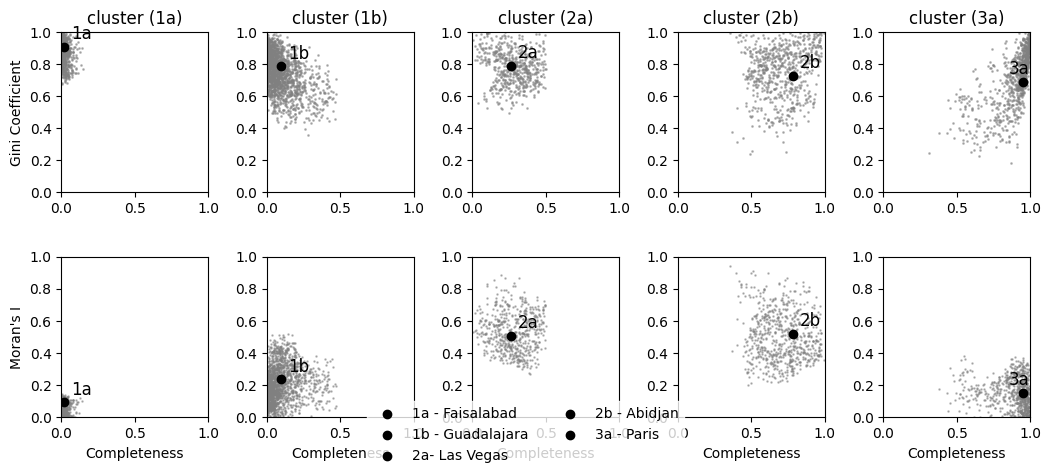

In [25]:
n_clusters = 5

urban_center_ids_selection = [
    6445,  # Faisalabad
    88,  # Guadalajara
    74,  # Las Vegas
    2859,  # Abidjan
    2054  # Paris
]   


colors = [
    "green",
    "blue",
    "black",
    "orange",
    "violet",
    "red"
]

# note: it's super confusing, but:
# cluster_label c --> cluster 1a
# cluster_label d --> cluster 1b
# cluster_label a --> cluster 2a
# cluster_label b --> cluster 2b
# cluster_label e --> cluster 3a
title_labels = [
    "cluster (1a)", "cluster (1b)", "cluster (2a)", "cluster (2b)", "cluster (3a)"
]

cluster_labels = [
    "c", "d", "a", "b", "e"
]


point_labels_names = [
    "1a - Faisalabad",
    "1b - Guadalajara",
    "2a- Las Vegas",
    "2b - Abidjan",
    "3a - Paris",
]

point_labels = [
    "1a",
    "1b",
    "2a",
    "2b",
    "3a",
]
size= 12

fig, axs = plt.subplots(2, n_clusters, figsize=(12.5, 5))
gs1 = gridspec.GridSpec(2, n_clusters)
gs1.update(wspace=0.4, hspace=0.4) # set the spacing between axes.

all_handles = []
all_labels = []

for i in range(0, n_clusters):
    # ax = plt.subplot(gs1[3*i])
    ax = plt.subplot(gs1[i])
    cluster_df = df.loc[df["cluster"] == cluster_labels[i]]

    cluster_df_selection = cluster_df.loc[cluster_df["urban_center_id"].isin(urban_center_ids_selection)]
    
    print(f"n={len(cluster_df)}")
    display(cluster_df_selection)
    
    
    ax.scatter(
        cluster_df["osm_completeness"],
        cluster_df["gini"],
        #color=colors[i],
        color="grey",
        s=1,
        alpha=0.5
    )
    
    ax.scatter(
        cluster_df_selection["osm_completeness"],
        cluster_df_selection["gini"],
        #color=colors[i],
        color="black",
        alpha=1,
        label=point_labels_names[i]
    )
    
    
    if cluster_df_selection["osm_completeness"].to_list()[0] > 0.9:
        ax.annotate(
            point_labels[i],
            (cluster_df_selection["osm_completeness"].to_list()[0] - 0.1,
             cluster_df_selection["gini"].to_list()[0] + 0.05),
            fontsize=size
        ) 
    else:
        ax.annotate(
            point_labels[i],
            (cluster_df_selection["osm_completeness"].to_list()[0] + 0.05,
             cluster_df_selection["gini"].to_list()[0] + 0.05),
            fontsize=size
        )
    
    
    # ax.set_xlabel("Completeness")
    if i == 0:
        ax.set_ylabel("Gini Coefficient")
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])
    ax.set_title(title_labels[i])
    #ax.grid()
    
    # ax = plt.subplot(gs1[1 + 3*i])
    ax = plt.subplot(gs1[i + n_clusters])
    ax.scatter(
        cluster_df["osm_completeness"],
        cluster_df["moran"],
        #color=colors[i],
        color="grey",
        s=0.7,
        alpha=0.5
    )
    
    
    if cluster_df_selection["osm_completeness"].to_list()[0] > 0.9:
        ax.annotate(
            point_labels[i],
            (cluster_df_selection["osm_completeness"].to_list()[0] - 0.1,
             cluster_df_selection["moran"].to_list()[0] + 0.05),
            fontsize=size
        )
        ax.scatter(
            cluster_df_selection["osm_completeness"],
            cluster_df_selection["moran"].to_list()[0],
            #color=colors[i],
            color="black",
            alpha=1,
            label=point_labels_names[i]
        )
    else:
        ax.scatter(
            cluster_df_selection["osm_completeness"],
            cluster_df_selection["moran"],
            #color=colors[i],
            color="black",
            alpha=1,
            label=point_labels_names[i]
        )
        ax.annotate(
            point_labels[i],
            (cluster_df_selection["osm_completeness"].to_list()[0] + 0.05,
             cluster_df_selection["moran"].to_list()[0] + 0.05),
            fontsize=size
        )
   
    ax.set_xlabel("Completeness")
    if i == 0:
        ax.set_ylabel("Moran's I")
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])
    #ax.grid()

    handles, labels = ax.get_legend_handles_labels()
    all_handles.append(handles[0])
    all_labels.append(labels[0])
    
fig.legend(
    all_handles,
    all_labels,
    loc='lower center',
    ncol=2,
    edgecolor="white"
)    

plt.savefig(
    "../figures/intra_urban_completeness_clustering_plot.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.75
)
plt.show()

### Plot Cluster Dendogram (for Figure 6)

In [6]:
import os
import pandas as pd
from sqlalchemy import create_engine

HOST = os.getenv("POSTGRES_HOST", default="localhost")
PORT = os.getenv("POSTGRES_PORT", default=5429)
DATABASE = os.getenv("POSTGRES_DB", default="osm-paper")
USER = os.getenv("POSTGRES_USER", default="osm-paper")
PASSWORD = os.getenv("POSTGRES_PASSWORD", default="osm-paper")


def load_dataframe():
    con = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
    query = f"""
        select 
            urban_center_id
            ,osm_completeness
            ,gini
            ,moran
        from inequality_measures_urban_centers
        order by urban_center_id
    """
    df = pd.read_sql_query(query, con=con)
    df.dropna(inplace=True)
    return df


def run_clustering_full(X):
    cluster = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0
    )
    cluster.fit(X)
    
    print(cluster.labels_)
    return cluster


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

4647
[2791 4447 3457 ...    4    1    0]


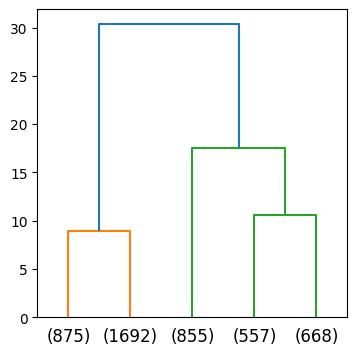

[2791 4447 3457 ...    4    1    0]


In [7]:
columns = [
    "osm_completeness",
    "gini",
    "moran"
]

df = load_dataframe()
X = df[columns].values

print(len(df))
    
cluster2 = run_clustering_full(X)

plt.figure(figsize=(4,4))
# plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(
    cluster2,
    truncate_mode='lastp',
    p=5,
)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig(
    "../figures/intra_urban_completeness_cluster_dendrogram.png",
    dpi=300,
    bbox_inches = 'tight'
)
plt.show()


print(cluster2.labels_)

## Evaluate cluster metrics for different number clusters

### Silhouette Coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- a: The mean distance between a sample and all other points in the same class
- b: The mean distance between a sample and all other points in the next nearest cluster.



### calinski harabasz
If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

(source: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

In [23]:
from sklearn import metrics

n_clusters = 5
columns = [
    "osm_completeness",
    "gini",
    "moran"
]

stats_df_cluster_test = df.dropna()
X = stats_df_cluster_test[columns].values

scores_list = []

for i in range(2, 9):
    cluster = AgglomerativeClustering(n_clusters=i).fit(X)
    s_score = metrics.silhouette_score(X, cluster.labels_, metric='euclidean')
    ch_score = metrics.calinski_harabasz_score(X,  cluster.labels_)
    
    scores_list.append([
        i,
        s_score,
        ch_score,
    ])

columns = [
    "n_clusters",
    "silhouette_score",
    "calinski_harabasz_score",
]
display(pd.DataFrame(scores_list, columns=columns))
    

,n_clusters,silhouette_score,calinski_harabasz_score
0,2,0.472981,4903.563012
1,3,0.460172,5026.227454
2,4,0.390851,4566.134909
3,5,0.296051,4393.210186
4,6,0.289387,4125.664983
5,7,0.285499,3930.195697
6,8,0.285980,3789.295499
